In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

In [3]:
apt = pd.read_csv("C:/Users/rmagm/OneDrive/바탕 화면/vscode/SDC_project/아파트_전세가율.csv")

In [22]:
# apt DataFrame에 'Unnamed: 0' 컬럼이 있다고 가정

if 'Unnamed: 0' in apt.columns:
    apt = apt.drop(columns=['Unnamed: 0'])
    print("컬럼 'Unnamed: 0'이 제거되었습니다.")
else:
    print("컬럼 'Unnamed: 0'이 존재하지 않습니다.")

컬럼 'Unnamed: 0'이 제거되었습니다.


In [4]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221516 entries, 0 to 221515
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      221516 non-null  int64  
 1   시군구                             221516 non-null  object 
 2   구                               221516 non-null  object 
 3   동                               221516 non-null  object 
 4   전용면적(㎡)                         221516 non-null  float64
 5   계약년월                            221516 non-null  int64  
 6   계약일                             221516 non-null  int64  
 7   전세금                             221516 non-null  int64  
 8   건축년도                            221516 non-null  int64  
 9   도로명                             221516 non-null  object 
 10  계약기간                            221516 non-null  object 
 11  계약구분                            221516 non-null  object 
 12  갱신요구권 사용        

In [ ]:
apt = apt.drop_duplicates()

In [29]:
apt[apt.duplicated()]

,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,계약기간,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율


In [5]:
office = pd.read_csv("C:/Users/rmagm/OneDrive/바탕 화면/vscode/SDC_project/오피스텔_전세가율.csv")

In [6]:
office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40075 entries, 0 to 40074
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      40075 non-null  int64  
 1   시군구                             40075 non-null  object 
 2   구                               40075 non-null  object 
 3   동                               40075 non-null  object 
 4   전용면적(㎡)                         40075 non-null  float64
 5   계약년월                            40075 non-null  int64  
 6   계약일                             40075 non-null  int64  
 7   전세금                             40075 non-null  int64  
 8   건축년도                            40075 non-null  float64
 9   도로명                             40075 non-null  object 
 10  계약기간                            40075 non-null  object 
 11  계약구분                            40075 non-null  object 
 12  갱신요구권 사용                        

In [7]:
multi_household = pd.read_csv("C:/Users/rmagm/OneDrive/바탕 화면/vscode/SDC_project/단독다가구_전세가율(중복허용).csv")

In [11]:
multi_household.isnull().sum()

시군구                                  0
구                                    0
동                                    0
전용면적(㎡)                              0
계약년월                                 0
계약일                                  0
전세금                                  0
건축년도                                 0
도로명                               2586
계약기간                                 0
계약구분                                 0
갱신요구권 사용                             0
종전계약 보증금(만원)                         0
종전계약 월세(만원)                          0
주택유형                                 0
계약시기                                 0
전세전환_갱신                              0
계약개월수                                0
is_계약개월수_missing                     0
is_갱신요구권_사용_originally_missing       0
is_건축년도_missing                      0
평균전세금                                0
평균매매가                                0
전세가율                                 0
dtype: int64

In [9]:
town_house = pd.read_csv("C:/Users/rmagm/OneDrive/바탕 화면/vscode/SDC_project/연립다세대_전세가율.csv")

In [5]:
town_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91508 entries, 0 to 91507
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   시군구                             91508 non-null  object 
 1   전용면적(㎡)                         91508 non-null  float64
 2   계약년월                            91508 non-null  int64  
 3   계약일                             91508 non-null  int64  
 4   전세금                             91508 non-null  int64  
 5   건축년도                            91508 non-null  int64  
 6   도로명                             91508 non-null  object 
 7   계약기간                            91508 non-null  object 
 8   계약구분                            91508 non-null  object 
 9   갱신요구권 사용                        91508 non-null  object 
 10  종전계약 보증금(만원)                    91508 non-null  object 
 11  종전계약 월세(만원)                     91508 non-null  float64
 12  주택유형                            

In [12]:
merged = pd.concat([town_house, multi_household,apt,office])

In [41]:
merged.isnull().sum()

시군구                                    0
전용면적(㎡)                                0
계약년월                                   0
계약일                                    0
전세금                                    0
건축년도                                   0
도로명                                 2586
계약기간                                   0
계약구분                                   0
갱신요구권 사용                               0
종전계약 보증금(만원)                           0
종전계약 월세(만원)                            0
주택유형                                   0
계약시기                                   0
구                                      0
전세전환_갱신                                0
계약개월수                                  0
is_계약개월수_missing                       0
is_갱신요구권_사용_originally_missing         0
동                                      0
is_건축년도_missing                        0
전세가율                                   0
평균매매가                                  0
평균전세금                                  0
Unnamed: 0      

In [13]:
merged['평균전세금'].isnull().sum()

np.int64(0)

In [15]:
merged.isnull().sum()

시군구                                    0
전용면적(㎡)                                0
계약년월                                   0
계약일                                    0
전세금                                    0
건축년도                                   0
도로명                                 2586
계약기간                                   0
계약구분                                   0
갱신요구권 사용                               0
종전계약 보증금(만원)                           0
종전계약 월세(만원)                            0
주택유형                                   0
계약시기                                   0
구                                      0
전세전환_갱신                                0
계약개월수                                  0
is_계약개월수_missing                       0
is_갱신요구권_사용_originally_missing         0
동                                      0
is_건축년도_missing                        0
전세가율                                   0
평균매매가                                  0
평균전세금                                  0
Unnamed: 0      

In [19]:
from sklearn.preprocessing import RobustScaler

# 계약연월 문자열화
merged['계약연월'] = merged['계약년월'].astype(str)

# 동일 주소 + 연월 거래수 계산
merged['구_연월'] = merged['구'] + '_' + merged['계약연월']
도로_빈도 = merged['구_연월'].value_counts().reset_index()
도로_빈도.columns = ['구_연월', '해당월_거래수']
merged = merged.merge(도로_빈도, on='구_연월', how='left')

In [20]:
# 면적대, 건축연도대 범주화
merged['면적대'] = pd.cut(merged['전용면적(㎡)'], bins=[0, 30, 50, 70, 100, 200], labels=['0-30', '30-50', '50-70', '70-100', '100+'])
merged['건축연도대'] = pd.cut(merged['건축년도'], bins=[0, 1980, 1990, 2000, 2010, 2020, 2030], labels=['~80', '80-90', '90-00', '00-10', '10-20', '20+'])

# 조건 그룹 생성 (구 + 건축연도대 + 면적대)
merged['조건그룹'] = merged[['구', '건축연도대', '면적대']].astype(str).agg('_'.join, axis=1)

In [21]:
# Z-score 기반 이상치 탐지
group_stats = merged.groupby('조건그룹')['전세금'].agg(['mean', 'std']).reset_index()
group_stats.columns = ['조건그룹', '전세금_평균', '전세금_표준편차']
merged = merged.merge(group_stats, on='조건그룹', how='left')
merged['전세금_zscore'] = (merged['전세금'] - merged['전세금_평균']) / merged['전세금_표준편차']
merged['전세금_이상치'] = merged['전세금_zscore'].abs() > 2


In [22]:
# 이상거래 플래그 추가
merged['거래_집중의심'] = merged['해당월_거래수'] >= 3
merged['노후건물'] = merged['건축년도'] < 1990
merged['노후_이상보증'] = merged['노후건물'] & merged['전세금_이상치']

In [23]:
# 구별 지표 집계
구별_지표 = merged.groupby('구').agg({
    '전세금_이상치': 'sum',
    '거래_집중의심': 'sum',
    '노후_이상보증': 'sum',
    '도로명': 'count'  # 총 거래 수
}).reset_index()


In [24]:
# 비율 계산
구별_지표['전세금_이상비율'] = 구별_지표['전세금_이상치'] / 구별_지표['도로명']
구별_지표['거래집중비율'] = 구별_지표['거래_집중의심'] / 구별_지표['도로명']
구별_지표['노후이상비율'] = 구별_지표['노후_이상보증'] / 구별_지표['도로명']

In [25]:
#  전세가율 지표 추가
구별_전세가율 = merged.groupby('구')['전세가율'].mean().reset_index()
구별_전세가율.columns = ['구', '평균_전세가율']
구별_지표 = 구별_지표.merge(구별_전세가율, on='구', how='left')

In [26]:
# 정규화 및 위험 스코어 계산
score_cols = ['전세금_이상비율', '거래집중비율', '노후이상비율', '평균_전세가율']
scaler = RobustScaler()
구별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(구별_지표[score_cols])

In [35]:
구별_지표['위험스코어'] = 구별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 상위 5개 구 추출
상위구 = 구별_지표.sort_values('위험스코어', ascending=False).head(10)
상위구

,구,전세금_이상치,거래_집중의심,노후_이상보증,도로명,전세금_이상비율,거래집중비율,노후이상비율,평균_전세가율,전세금_이상비율_정규화,거래집중비율_정규화,노후이상비율_정규화,평균_전세가율_정규화,위험스코어
4,관악구,584,15182,95,14683,0.039774,1.033985,0.006470,45.771749,-0.398580,6.084307,0.015702,-0.765489,1.233985
8,노원구,1040,20410,378,20351,0.051103,1.002899,0.018574,49.752615,1.093398,-0.273565,2.987827,-0.270077,0.884396
9,도봉구,457,9674,123,9648,0.047367,1.002695,0.012749,56.060031,0.601420,-0.315342,1.557433,0.514871,0.589595
16,성북구,675,14379,52,14212,0.047495,1.011751,0.003659,53.807211,0.618243,1.536807,-0.674585,0.234511,0.428744
19,영등포구,1003,21307,139,21141,0.047443,1.007852,0.006575,53.502406,0.611432,0.739441,0.041444,0.196579,0.397224
11,동작구,732,16170,92,15933,0.045942,1.014875,0.005774,44.482536,0.413765,2.175781,-0.155174,-0.925929,0.377111
18,양천구,777,18213,255,18154,0.042800,1.003250,0.014046,49.173639,0.000000,-0.201806,1.876092,-0.342129,0.333039
10,동대문구,533,13756,57,13620,0.039134,1.009985,0.004185,61.062421,-0.482898,1.175752,-0.545391,1.137410,0.321218
24,중랑구,596,14121,57,13950,0.042724,1.012258,0.004086,53.716206,-0.010071,1.640591,-0.569700,0.223186,0.321001
23,중구,285,5886,16,5864,0.048602,1.003752,0.002729,63.547804,0.763969,-0.099188,-0.903037,1.446712,0.302114


2023.6 ~ 2024년 전세사기 기사화 빈도 기준 주요 서울 구 순위

| 순위 | 구    | 주요 피해 및 기사화 특징                         |
| -- | ---- | -------------------------------------- |
| 1  | 관악구  | 신림·봉천동 중심 전세사기 피해·단속 사례 다수, 언론 보도 최다   |
| 2  | 노원구  | 상계·중계동 다세대·원룸 중심 전세사기 집중, 지속적 기사화      |
| 3  | 동대문구 | 답십리·제기동 원룸 밀집지역에서 피해 및 단속 사례 빈번        |
| 4  | 도봉구  | 방학동 노후 단독주택 대상 전세사기 피해 다수, 경찰 단속 보도 포함 |
| 5  | 성북구  | 정릉동·장위동 전세사기 신고 증가, 깡통전세 관련 보도 꾸준      |
| 6  | 강서구  | 방화동·화곡동 원룸·다세대 피해 지속, 단속 및 피해 사례 보도 다수 |
| 7  | 구로구  | 고척동·개봉동 원룸·다세대 피해 증가, 단속 관련 기사 존재      |
| 8  | 금천구  | 독산동 신축빌라·다세대주택 피해 사례 보고 및 단속 보도 포함     |
| 9  | 영등포구 | 양평동·당산동 오피스텔 중심 피해 및 단속 사례, 언론 보도 존재   |


요약
관악구, 노원구, 도봉구, 성북구, 영등포구는 이미 위험 스코어 상위 5개에 포함되어 있고, 기사화 사례도 많음

강서구, 동대문구, 금천구, 구로구는 상대적으로 위험도는 중간 이하일 수 있으나 2023년 6월 이후에도 꾸준히 전세사기 피해 사례 및 단속 기사들이 보도됨

이들 구는 주로 노후 다세대, 원룸 밀집지역 중심으로 피해가 


C:\Users\rmagm\AppData\Local\Temp\ipykernel_13596\739190575.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='위험스코어', y='구', data=상위구.sort_values('위험스코어'), palette='Reds_r')


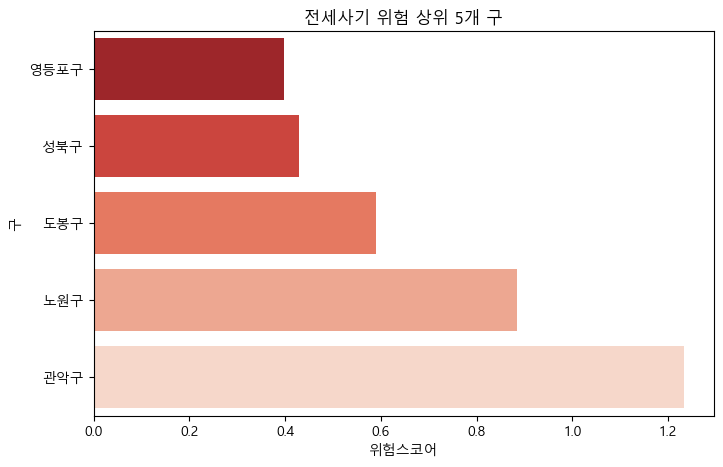

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 깨짐 방지 (환경에 맞게 설치 및 설정 필요)
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우
plt.rcParams['axes.unicode_minus'] = False

# 상위 위험구 데이터 (이미 계산된 상위구 변수 사용)
plt.figure(figsize=(8,5))
sns.barplot(x='위험스코어', y='구', data=상위구.sort_values('위험스코어'), palette='Reds_r')
plt.title('전세사기 위험 상위 5개 구')
plt.xlabel('위험스코어')
plt.ylabel('구')
plt.show()


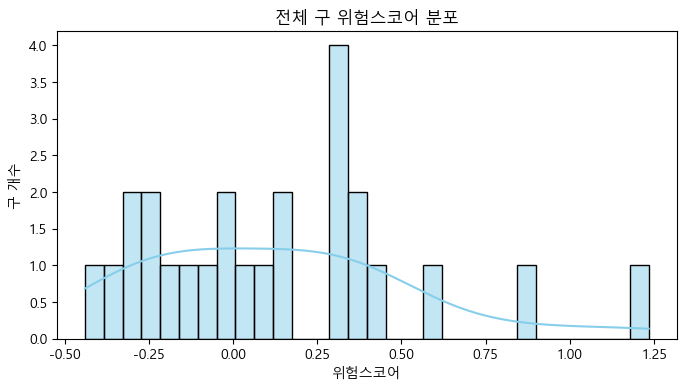

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(구별_지표['위험스코어'], bins=30, kde=True, color='skyblue')
plt.title('전체 구 위험스코어 분포')
plt.xlabel('위험스코어')
plt.ylabel('구 개수')
plt.show()

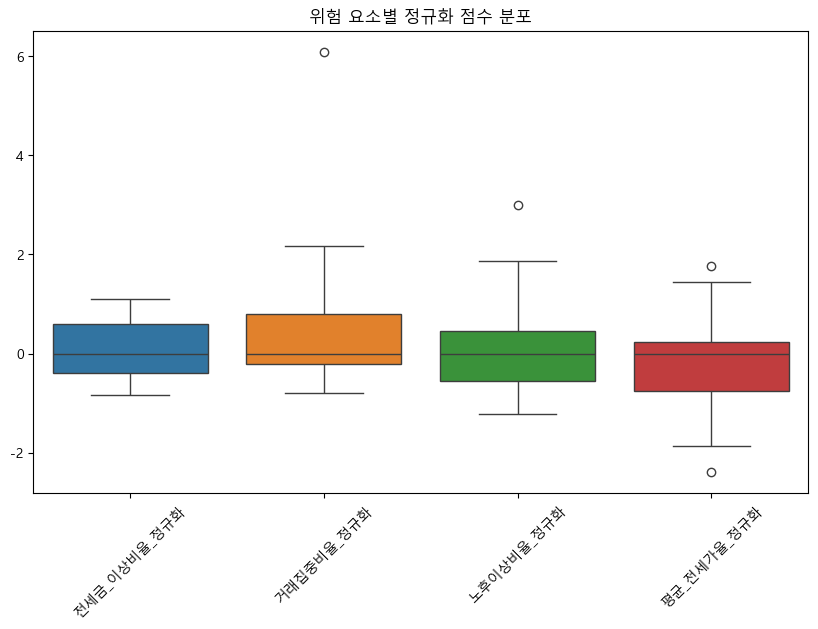

In [31]:
score_cols_normalized = [f'{col}_정규화' for col in ['전세금_이상비율', '거래집중비율', '노후이상비율', '평균_전세가율']]

plt.figure(figsize=(10,6))
sns.boxplot(data=구별_지표[score_cols_normalized])
plt.title('위험 요소별 정규화 점수 분포')
plt.xticks(rotation=45)
plt.show()

In [32]:
pip install folium geopandas


   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --------------------- ------------------ 10.2/19.2 MB 49.1 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 54.6 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 44.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 53.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 49.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
geo_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'


In [34]:
import folium
import geopandas as gpd

# 1) 서울시 구 경계 GeoJSON 읽기
geo_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_geo = gpd.read_file(geo_path)

# 2) 구 이름 컬럼명 맞추기 (GeoJSON의 구 이름 컬럼명은 'name'임)
# 데이터와 구명 컬럼명 통일
seoul_geo = seoul_geo.rename(columns={'name': '구'})

# 3) 구 이름 맞춤 (만약 데이터 구 이름이 다르면 이 단계에서 조정 필요)
# 구별_지표['구']와 seoul_geo['구'] 이름이 완전히 일치하는지 확인
print(set(구별_지표['구']) - set(seoul_geo['구']))  # 빈 집합이어야 함

# 4) 위험스코어 데이터와 GeoJSON 병합
geo_merged = seoul_geo.set_index('구').join(구별_지표.set_index('구'))

# 5) Folium 지도 생성 (서울시 중심 좌표)
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 6) Choropleth 추가 (위험스코어 기준)
folium.Choropleth(
    geo_data=geo_merged.__geo_interface__,
    data=geo_merged,
    columns=[geo_merged.index, '위험스코어'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    legend_name='전세사기 위험스코어',
    highlight=True,
    nan_fill_color='gray'
).add_to(m)

# 7) 팝업으로 구별 위험스코어 표시
for _, r in geo_merged.iterrows():
    if pd.notna(r['위험스코어']):
        sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
        geo_json = sim_geo.to_json()
        folium.GeoJson(
            geo_json,
            style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.5},
            tooltip=folium.Tooltip(f"{r.name}<br>위험스코어: {r['위험스코어']:.2f}")
        ).add_to(m)

# 8) 지도 출력
m


set()


### 2차 분석 -> 선별 상위 5개 구 동 단위 위험 탐지 분석
1. 목적 정의     

1-1. 왜 동 단위 분석이 필요한가?
    - 구 단위는 너무 넓어, 특정 위험지역 ‘핫스팟’ 파악에 한계 있음
    - 동 단위로 세분화하여, 실제 사기 피해가 집중된 ‘위험 동’ 식별
1-2. 기대 효과

    - 정책 및 단속 인력 집중 배치

    - 피해 예방 및 홍보 타겟팅



### 1. 상위 5개 구 추출

In [36]:
# 위험스코어 기준 내림차순 정렬 후 상위 5개 추출
상위5구 = 구별_지표.sort_values('위험스코어', ascending=False).head(5)

print(상위5구[['구', '위험스코어']])

       구     위험스코어
4    관악구  1.233985
8    노원구  0.884396
9    도봉구  0.589595
16   성북구  0.428744
19  영등포구  0.397224


In [37]:
# 상위 5개 구 리스트
top5_gu = ['관악구', '노원구', '도봉구', '성북구', '영등포구']

# merged: 전체 데이터프레임 (전세 거래 원본 데이터)
top5_data = merged[merged['구'].isin(top5_gu)].copy()

In [38]:
# 1. 상위 5개 구 필터링
top5_gu = ['관악구', '노원구', '도봉구', '성북구', '영등포구']
top5_data = merged[merged['구'].isin(top5_gu)].copy()

# 2. 동 단위 위험 지표 집계 (기존 컬럼 그대로 사용)
동별_지표 = top5_data.groupby('동').agg({
    '전세금_이상치': 'sum',
    '거래_집중의심': 'sum',
    '노후_이상보증': 'sum',
    '도로명': 'count',   # 총 거래 수
    '전세가율': 'mean'
}).reset_index()

# 3. 비율 계산
동별_지표['전세금_이상비율'] = 동별_지표['전세금_이상치'] / 동별_지표['도로명']
동별_지표['거래집중비율'] = 동별_지표['거래_집중의심'] / 동별_지표['도로명']
동별_지표['노후이상비율'] = 동별_지표['노후_이상보증'] / 동별_지표['도로명']
동별_지표['평균_전세가율'] = 동별_지표['전세가율']

# 4. 정규화 및 위험스코어 계산
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
score_cols = ['전세금_이상비율', '거래집중비율', '노후이상비율', '평균_전세가율']
동별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(동별_지표[score_cols])

동별_지표['위험스코어'] = 동별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 5. 위험 동 상위 20개 추출
top_20_dong = 동별_지표.sort_values('위험스코어', ascending=False).head(20)

In [42]:
# 1. 상위 5개 구 필터링
top5_data = merged[merged['구'].isin(top5_gu)].copy()

# 2. 동 조건그룹 기반 Z-score 이상치 판단
top5_data['동_조건그룹'] = top5_data[['동', '건축연도대', '면적대']].astype(str).agg('_'.join, axis=1)

group_stats = top5_data.groupby('동_조건그룹')['전세금'].agg(['mean', 'std']).reset_index()
top5_data = top5_data.merge(group_stats, on='동_조건그룹', how='left')

top5_data['동조건_zscore'] = (top5_data['전세금'] - top5_data['mean']) / top5_data['std']
top5_data['동조건_이상치'] = top5_data['동조건_zscore'].abs() > 2

# 3. 동별 위험 지표 집계
동별_지표 = top5_data.groupby('동').agg({
    '전세금_이상치': 'sum',
    '동조건_이상치': 'sum',
    '거래_집중의심': 'sum',
    '노후_이상보증': 'sum',
    '도로명': 'count',
    '전세가율': 'mean'
}).reset_index()

# 4. 비율 계산
동별_지표['전세금_이상비율'] = 동별_지표['전세금_이상치'] / 동별_지표['도로명']
동별_지표['동조건_이상비율'] = 동별_지표['동조건_이상치'] / 동별_지표['도로명']
동별_지표['거래집중비율'] = 동별_지표['거래_집중의심'] / 동별_지표['도로명']
동별_지표['노후이상비율'] = 동별_지표['노후_이상보증'] / 동별_지표['도로명']
동별_지표['평균_전세가율'] = 동별_지표['전세가율']

# 5. 정규화 및 위험스코어
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
score_cols = ['전세금_이상비율', '동조건_이상비율', '거래집중비율', '노후이상비율', '평균_전세가율']
동별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(동별_지표[score_cols])

동별_지표['위험스코어'] = 동별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 6. 위험 동 상위 20개 출력
top_20_dong = 동별_지표.sort_values('위험스코어', ascending=False).head(20)

print("⚠️ 상위 5개 구 내 동 단위 위험스코어 TOP 20")
print(top_20_dong[['동', '위험스코어'] + score_cols])

⚠️ 상위 5개 구 내 동 단위 위험스코어 TOP 20
         동     위험스코어  전세금_이상비율  동조건_이상비율    거래집중비율    노후이상비율    평균_전세가율
20  동소문동2가  4.112298  0.181818  0.000000  1.090909  0.181818  11.035296
19  동소문동1가  1.672353  0.133333  0.000000  1.066667  0.066667  33.426236
27   문래동2가  1.601647  0.097561  0.000000  1.000000  0.097561  44.279214
45   삼선동5가  1.297636  0.120482  0.012048  1.060241  0.048193  32.836733
56   안암동3가  1.183776  0.111111  0.030303  1.020202  0.050505  40.734403
58   안암동5가  1.043870  0.013333  0.040000  1.133333  0.013333  24.003804
26   문래동1가  1.002245  0.058824  0.000000  1.000000  0.058824  69.726901
49     성북동  0.793024  0.104121  0.043384  1.015184  0.021692  50.743415
24  동소문동6가  0.630424  0.095238  0.031746  1.063492  0.000000  45.674598
81     하계동  0.607363  0.038835  0.044229  1.001079  0.033441  50.404342
6    당산동3가  0.558487  0.151986  0.043178  1.012090  0.000000  52.502123
41   삼선동1가  0.545707  0.081818  0.036364  1.054545  0.018182  19.587804
46     상계동  0.542488  0.050374  0

In [43]:
import folium
import geopandas as gpd

# [1] 동별 GeoJSON 파일 불러오기 (서울시 행정동)
# 서울시 행정동 GeoJSON 경로 또는 URL (예시, 본인 경로로 교체 필요)
seoul_geo_path = 'seoul_dong_geo.json'  # 또는 온라인 경로

# GeoDataFrame 로딩
dong_gdf = gpd.read_file(seoul_geo_path)

# [2] 병합 준비 (동 이름 통일 필요)
dong_gdf['동'] = dong_gdf['ADM_DR_NM'].str.replace(' ', '')
top_20_dong['동'] = top_20_dong['동'].str.replace(' ', '')

# [3] 병합
map_data = dong_gdf.merge(top_20_dong, on='동', how='left')

# [4] 중심 위치: 서울
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# [5] Choropleth 추가
folium.Choropleth(
    geo_data=map_data,
    data=map_data,
    columns=['동', '위험스코어'],
    key_on='feature.properties.동',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='동 단위 위험스코어 (Top 20)'
).add_to(m)

# [6] 동 이름 라벨 표시
for _, row in map_data.iterrows():
    if not pd.isna(row['위험스코어']):
        folium.Marker(
            location=[row.geometry.centroid.y, row.geometry.centroid.x],
            popup=f"{row['동']}<br>위험스코어: {round(row['위험스코어'], 2)}"
        ).add_to(m)

# 저장 또는 표시
m.save('top20_dong_risk_map.html')

DataSourceError: seoul_dong_geo.json: No such file or directory

In [46]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import folium
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapi")

# 예시: 위험 동 목록에서 위도/경도 가져오기
dong_coords = []
for dong in top_20_dong['동']:
    try:
        location = geolocator.geocode(f"서울특별시 {dong}")
        if location:
            dong_coords.append({
                '동': dong,
                '위험스코어': top_20_dong.loc[top_20_dong['동'] == dong, '위험스코어'].values[0],
                'lat': location.latitude,
                'lon': location.longitude
            })
        time.sleep(1)  # 너무 빠르게 요청하지 않도록
    except:
        continue

import pandas as pd
coords_df = pd.DataFrame(dong_coords)

# 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

for _, row in coords_df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=7,
        color='red',
        fill=True,
        fill_color='red',
        popup=f"{row['동']}<br>위험스코어: {round(row['위험스코어'], 2)}"
    ).add_to(m)

m.save("top20_dong_risk_map_estimated.html")

C:\Users\rmagm\AppData\Local\Temp\ipykernel_13596\3532720597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


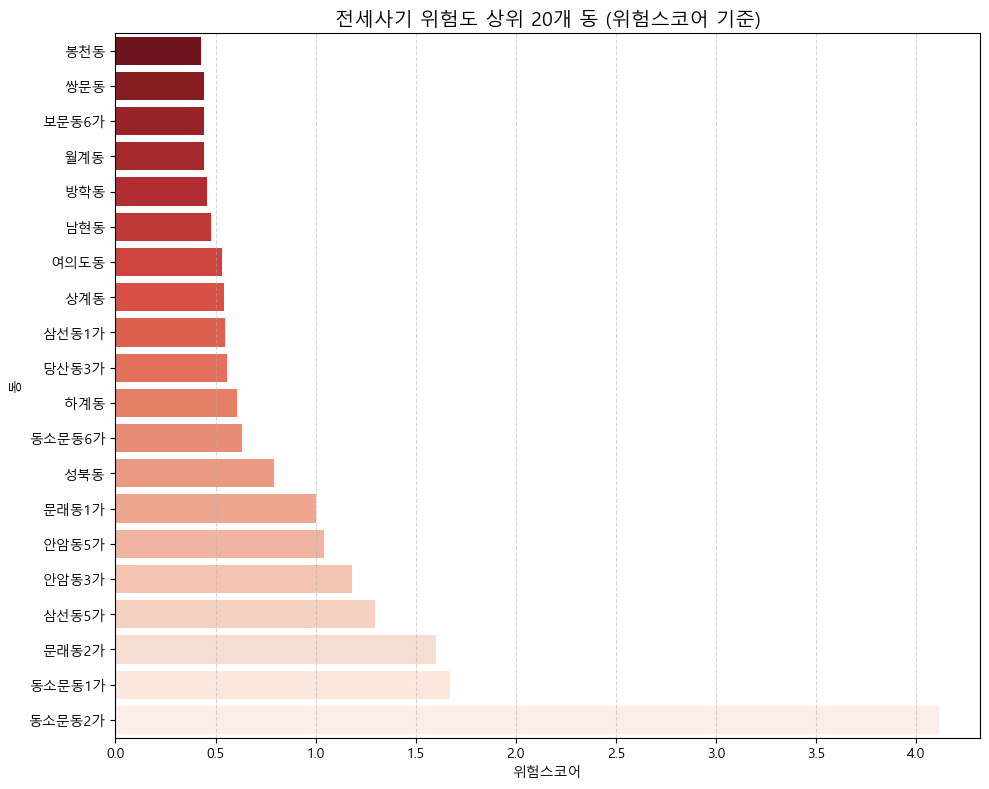

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# [1] 정렬
top_20_sorted = top_20_dong.sort_values('위험스코어', ascending=True)

# [2] 그래프
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top_20_sorted,
    x='위험스코어',
    y='동',
    palette='Reds_r'
)
plt.title('전세사기 위험도 상위 20개 동 (위험스코어 기준)', fontsize=14)
plt.xlabel('위험스코어')
plt.ylabel('동')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('top20_dong_risk_score.png', dpi=300)
plt.show()


In [40]:
top_20_dong

,동,전세금_이상치,거래_집중의심,노후_이상보증,도로명,전세가율,전세금_이상비율,거래집중비율,노후이상비율,평균_전세가율,전세금_이상비율_정규화,거래집중비율_정규화,노후이상비율_정규화,평균_전세가율_정규화,위험스코어
20,동소문동2가,2,12,2,11,11.035296,0.181818,1.090909,0.181818,11.035296,3.144603,4.256672,17.829499,-2.719098,5.627919
19,동소문동1가,4,32,2,30,33.426236,0.133333,1.066667,0.066667,33.426236,2.104226,3.034850,6.420632,-1.247761,2.577987
27,문래동2가,4,41,4,41,44.279214,0.097561,1.000000,0.097561,44.279214,1.336631,-0.325162,9.481548,-0.534598,2.489605
45,삼선동5가,10,88,4,83,32.836733,0.120482,1.060241,0.048193,32.836733,1.828464,2.710993,4.590294,-1.286498,1.960813
26,문래동1가,1,17,1,17,69.726901,0.058824,1.000000,0.058824,69.726901,0.505412,-0.325162,5.643558,1.137602,1.740352
56,안암동3가,11,101,5,99,40.734403,0.111111,1.020202,0.050505,40.734403,1.627387,0.693023,4.819388,-0.767532,1.593067
58,안암동5가,1,85,1,75,24.003804,0.013333,1.133333,0.013333,24.003804,-0.470706,6.394862,1.136526,-1.866920,1.298440
49,성북동,48,468,10,461,50.743415,0.104121,1.015184,0.021692,50.743415,1.477405,0.440133,1.964675,-0.109827,0.943097
24,동소문동6가,6,67,0,63,45.674598,0.095238,1.063492,0.000000,45.674598,1.286788,2.874849,-0.184501,-0.442905,0.883558
34,보문동2가,4,52,0,49,43.895139,0.081633,1.061224,0.000000,43.895139,0.994845,2.760563,-0.184501,-0.559836,0.752768


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler

# --- 0. 데이터 로드 및 초기 전처리 (예시 데이터 사용) ---
# 실제 데이터 로드 시 이 부분을 사용하세요.
# multi_household = pd.read_csv("your_jeonse_data.csv")
# sale_data = pd.read_csv("your_sale_data.csv")

# ==========================================================
# 예시 데이터 생성 (실제 데이터로 대체 필요!)
# ==========================================================

print("--- 0. 데이터 로드 및 초기 전처리 완료 ---")
print("multi_household head:\n", multi_household.head(2))
print("\nsale_data head:\n", sale_data.head(2))

# --- 공통 구간화 기준 설정 (전세/매매 데이터에 동일 적용) ---
bins_year = [1900, 1989, 1999, 2009, 2019, 2031] # 2031은 2020년대 포함 위함
labels_year = ['~1989', '1990s', '2000s', '2010s', '2020s']

bins_area = [0, 30, 50, 70, 100, 999] # 999는 100+ 포함 위함
labels_area = ['~30', '30-50', '50-70', '70-100', '100+']


# --- 1. 매매 데이터 전처리 및 그룹별 평균 매매가 계산 ---
print("\n--- 1. 매매 데이터 전처리 및 그룹별 평균 매매가 계산 ---")

# 1.1 '건축년도대' 구간화
sale_data['건축년도대'] = pd.cut(sale_data['건축년도'], bins=bins_year, labels=labels_year, right=False)
# NaN 값 처리: 카테고리에 'NaN_or_Missing' 추가 후 채우기
sale_data['건축년도대'] = sale_data['건축년도대'].cat.add_categories('NaN_or_Missing')
sale_data['건축년도대'].fillna('NaN_or_Missing', inplace=True)

# 1.2 '면적대' 구간화
sale_data['면적대'] = pd.cut(sale_data['전용면적(㎡)'], bins=bins_area, labels=labels_area, right=False)
# NaN 값 처리
sale_data['면적대'] = sale_data['면적대'].cat.add_categories('NaN_or_Missing')
sale_data['면적대'].fillna('NaN_or_Missing', inplace=True)

# 1.3 그룹별 평균 매매가 계산
group_cols_for_sale_avg = ['구', '주택유형', '건축년도대', '면적대']
avg_sale_price_by_group = sale_data.groupby(group_cols_for_sale_avg)['거래금액(만원)'].mean().reset_index()
avg_sale_price_by_group.columns = group_cols_for_sale_avg + ['그룹_평균_매매가(만원)']

print("매매 데이터 그룹별 평균 매매가 일부:\n", avg_sale_price_by_group.head())


# --- 2. 전세 데이터 전처리 (구간화 및 추가 컬럼 생성) ---
print("\n--- 2. 전세 데이터 전처리 ---")

# 2.1 '건축년도대' 구간화 (전세 데이터에도 동일 적용)
multi_household['건축년도대'] = pd.cut(multi_household['건축년도'], bins=bins_year, labels=labels_year, right=False)
multi_household['건축년도대'] = multi_household['건축년도대'].cat.add_categories('NaN_or_Missing')
multi_household['건축년도대'].fillna('NaN_or_Missing', inplace=True)

# 2.2 '면적대' 구간화 (전세 데이터에도 동일 적용)
multi_household['면적대'] = pd.cut(multi_household['계약면적(㎡)'], bins=bins_area, labels=labels_area, right=False)
multi_household['면적대'] = multi_household['면적대'].cat.add_categories('NaN_or_Missing')
multi_household['면적대'].fillna('NaN_or_Missing', inplace=True)

# 2.3 '계약연월' 컬럼을 문자열로 변환 (추후 '도로명_연월' 생성용)
multi_household['계약연월'] = multi_household['계약년월'].astype(str)


# --- 3. 전세 데이터에 그룹별 평균 매매가 병합 ---
print("\n--- 3. 전세 데이터에 그룹별 평균 매매가 병합 ---")
multi_household = pd.merge(multi_household, avg_sale_price_by_group,
                           on=group_cols_for_sale_avg,
                           how='left')

print("전세 데이터 (평균 매매가 병합 후) 일부:\n", multi_household[['NO', '구', '주택유형', '건축년도대', '면적대', '그룹_평균_매매가(만원)']].head())


# --- 4. 전세가율 계산 및 관련 지표 생성 ---
print("\n--- 4. 전세가율 계산 및 관련 지표 생성 ---")

# 4.1 전세가율 계산 핵심 식
multi_household['전세가율'] = (multi_household['보증금(만원)'] / multi_household['그룹_평균_매매가(만원)']) * 100

# 4.2 is_전세가율_missing 플래그 생성 (매매가 매칭 안 된 경우)
multi_household['is_전세가율_missing'] = multi_household['전세가율'].isna().astype(int)

# 4.3 전세가율 결측치 처리 (NaN 값을 -1로 채우기)
multi_household['전세가율'].fillna(-1, inplace=True)

# 4.4 전세가율 고위험 플래그 생성 (예: 90% 이상)
multi_household['전세가율_고위험'] = (multi_household['전세가율'] >= 90).astype(int)
# 전세가율이 -1인 경우 (매칭 안된 경우)는 고위험으로 보지 않음 (is_전세가율_missing으로 따로 처리)
multi_household.loc[multi_household['전세가율'] == -1, '전세가율_고위험'] = 0


print("전세가율 계산 결과 일부:\n", multi_household[['NO', '보증금(만원)', '그룹_평균_매매가(만원)', '전세가율', 'is_전세가율_missing', '전세가율_고위험']].head(10))
print(f"전세가율 정보가 없는 거래 수: {multi_household['is_전세가율_missing'].sum()}개")


# --- 5. 기타 이상 탐지 지표 생성 (기존 플로우) ---
print("\n--- 5. 기타 이상 탐지 지표 생성 ---")

# 5.1 지표 1: 보증금 이상치 (유사 조건 그룹 대비 Z-score)
multi_household['조건그룹_zscore'] = multi_household[['구', '건축년도대', '면적대']].astype(str).agg('_'.join, axis=1)

group_stats_zscore = multi_household.groupby('조건그룹_zscore')['보증금(만원)'].agg(['mean', 'std']).reset_index()
group_stats_zscore.columns = ['조건그룹_zscore', '보증금_평균_그룹', '보증금_표준편차_그룹']

multi_household = multi_household.merge(group_stats_zscore, on='조건그룹_zscore', how='left')

# 표준편차가 0인 경우 (그룹 내 모든 값이 같을 때) NaN 처리하여 Z-score도 NaN이 되게 함
multi_household['보증금_표준편차_그룹'].replace(0, np.nan, inplace=True)
multi_household['보증금_zscore'] = (multi_household['보증금(만원)'] - multi_household['보증금_평균_그룹']) / multi_household['보증금_표준편차_그룹']
multi_household['보증금_이상치'] = (multi_household['보증금_zscore'].abs() > 2).astype(int) # Z-score 2 초과이면 이상치
multi_household['보증금_이상치'].fillna(0, inplace=True) # Z-score 계산 불가시 (std=0 등) 이상치 아님으로 간주

# 5.2 지표 2: 동일 주소 + 월 거래수 ≥ 3 → 사기 의심 클러스터
multi_household['도로명_연월'] = multi_household['도로명'] + '_' + multi_household['계약연월'].astype(str)
주소_빈도 = multi_household['도로명_연월'].value_counts().reset_index()
주소_빈도.columns = ['도로명_연월', '주소_해당월_거래수']

multi_household = multi_household.merge(주소_빈도, on='도로명_연월', how='left')
multi_household['거래_집중의심'] = (multi_household['주소_해당월_거래수'] >= 3).astype(int)

# 5.3 지표 3: 노후 건물 중 이상 보증금 비율
multi_household['노후건물'] = (multi_household['건축년도'] < 1990).astype(int)
multi_household['노후_이상보증'] = (multi_household['노후건물'] & multi_household['보증금_이상치']).astype(int)


# --- 6. 구 단위로 집계 및 비율 계산 ---
print("\n--- 6. 구 단위로 집계 및 비율 계산 ---")

구별_지표 = multi_household.groupby('구').agg(
    보증금_이상치=('보증금_이상치', 'sum'),
    거래_집중의심=('거래_집중의심', 'sum'),
    노후_이상보증=('노후_이상보증', 'sum'),
    전세가율_고위험_건수=('전세가율_고위험', 'sum'),
    전세가율_정보없음_건수=('is_전세가율_missing', 'sum'), # 전세가율 정보 없음 건수
    총_거래수=('NO', 'count') # 해당 구의 총 거래 수
).reset_index()

# 비율 계산
구별_지표['보증금_이상비율'] = 구별_지표['보증금_이상치'] / 구별_지표['총_거래수']
구별_지표['거래집중비율'] = 구별_지표['거래_집중의심'] / 구별_지표['총_거래수']
구별_지표['노후이상비율'] = 구별_지표['노후_이상보증'] / 구별_지표['총_거래수']
구별_지표['전세가율_고위험_비율'] = 구별_지표['전세가율_고위험_건수'] / 구별_지표['총_거래수']
구별_지표['전세가율_정보없음_비율'] = 구별_지표['전세가율_정보없음_건수'] / 구별_지표['총_거래수']

# 총_거래수가 0인 경우 (해당 구 거래 없음) 비율이 NaN이 될 수 있으므로 0으로 처리
for col in ['보증금_이상비율', '거래집중비율', '노후이상비율', '전세가율_고위험_비율', '전세가율_정보없음_비율']:
    구별_지표[col].fillna(0, inplace=True)
    구별_지표[col].replace([np.inf, -np.inf], 0, inplace=True) # 혹시 모를 무한대 값 처리

print("구별 지표 계산 결과 일부:\n", 구별_지표.head())


# --- 7. 구별 종합 위험 점수 계산 (정규화) ---
print("\n--- 7. 구별 종합 위험 점수 계산 ---")

scaler = RobustScaler() # RobustScaler 사용

score_cols = ['보증금_이상비율', '거래집중비율', '노후이상비율',
              '전세가율_고위험_비율', '전세가율_정보없음_비율']

# 각 비율 컬럼 정규화
구별_지표[[f'{col}_정규화' for col in score_cols]] = scaler.fit_transform(구별_지표[score_cols])

# 종합 스코어 = 정규화된 지표들의 평균
구별_지표['위험스코어'] = 구별_지표[[f'{col}_정규화' for col in score_cols]].mean(axis=1)

# 위험 상위 구 보기 (내림차순 정렬)
상위구 = 구별_지표.sort_values('위험스코어', ascending=False).head(5)

print("\n--- 위험 스코어 상위 5개 구 ---")
print(상위구)

--- 0. 데이터 로드 및 초기 전처리 완료 ---
multi_household head:
    NO            시군구  계약면적(㎡) 전월세구분        계약년월  계약일  보증금(만원)  월세금(만원)  \
0   2  서울특별시 성동구 행당동    42.00    전세  2024-12-01   31    14000        0   
1   5  서울특별시 용산구 서계동    26.45    전세  2024-12-01   31     3000        0   

     건축년도        도로명  ...             조건그룹        보증금_평균     보증금_표준편차  \
0  1998.0      마조로1길  ...  성동구_90-00_30-50  14437.065854  5052.099432   
1  1944.0  효창원로104라길  ...     용산구_~80_0-30  10729.650407  3820.112643   

   보증금_zscore  보증금_이상치                도로명_연월 해당월_거래수  거래_집중의심   노후건물 노후_이상보증  
0   -0.086512    False      마조로1길_2024-12-01     3.0     True  False   False  
1   -2.023409     True  효창원로104라길_2024-12-01     1.0    False   True    True  

[2 rows x 31 columns]

sale_data head:
    NO             시군구   번지 주택유형  도로조건  연면적(㎡)  대지면적(㎡)    계약년월  계약일 거래금액(만원)  \
0   1   서울특별시 강북구 수유동  1**   단독  8m미만   39.67     65.5  202312   30   20,000   
1   2  서울특별시 동작구 노량진동  2**   단독  8m미만  157.74    119.0  202312   3

C:\Users\rmagm\AppData\Local\Temp\ipykernel_4668\1064765762.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sale_data['건축년도대'].fillna('NaN_or_Missing', inplace=True)


KeyError: '전용면적(㎡)'